In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from attributes.individual.education.education_attainment import (add_3_categories_education_level,
                                                                  get_education_attainment_margins)
from attributes.individual.migration_background import (fit_df_migration_background,
                                                        read_df_migration_background_marginal)
from attributes.marginal_data_reader import read_marginal_data
from gensynthpop.utils.extractors import synthetic_population_to_contingency

sns.set_theme()

# Paper Plots
This notebook is meant to do to the analysis and plotting of the percentage-point difference between the observed (in the synthetic population) and expected (as provided by the data).

Update: This figure has appeared as Figure 5 in version 2.0 of the paper.

In [ ]:
figs = '../doc/figures/paper/'

In [ ]:
df_synth_pop = pd.read_pickle('../output/synthetic_population/individuals/synth_pop_DHWZ_v11.pkl')
df_synth_pop = add_3_categories_education_level(df_synth_pop)
df_synth_pop

,agent_id,neighb_code,age_group,gender,age,small_age_group,migration_background,education_attainment_age_group,absolved_education,education_age_group,current_education,license_age,car_license,motorcycle_license,moped_license,household_position,absolved_edu_3_cats
0,SA000000,BU05181785,25-45,female,28,25-30,Dutch,25-35,"311 Hbo-, wo-bachelor",28,not_enrolled,25-30,yes,yes,yes,single,high
1,SA000001,BU05181785,25-45,female,27,25-30,Dutch,25-35,"121 Vmbo-b/k, mbo1",27,not_enrolled,25-30,yes,no,yes,non_married_no_children,low
2,SA000002,BU05181785,25-45,female,26,25-30,NonWestern,25-35,212 Mbo4,26,not_enrolled,25-30,yes,no,yes,married_with_2_children,middle
3,SA000003,BU05181785,25-45,male,44,40-45,Dutch,35-45,"311 Hbo-, wo-bachelor",40-45,not_enrolled,40-50,yes,yes,yes,single,high
4,SA000004,BU05181785,25-45,male,43,40-45,Dutch,35-45,"321 Hbo-, wo-master, doctor",40-45,not_enrolled,40-50,yes,no,yes,married_with_1_children,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84875,SA084875,BU05183639,65+,male,65,65-70,NonWestern,65-75,"213 Havo, vwo",65-70,not_enrolled,65-70,no,no,no,married_with_2_children,middle
84876,SA084876,BU05183639,65+,male,65,65-70,NonWestern,65-75,"213 Havo, vwo",65-70,not_enrolled,65-70,no,no,no,married_with_2_children,middle
84877,SA084877,BU05183639,65+,male,65,65-70,NonWestern,65-75,"213 Havo, vwo",65-70,not_enrolled,65-70,no,no,no,married_with_2_children,middle
84878,SA084878,BU05183639,65+,male,65,65-70,NonWestern,65-75,"213 Havo, vwo",65-70,not_enrolled,65-70,no,no,no,married_with_3_children,middle


ipfn converged: convergence_rate not updating or below rate_tolerance
Fitted migration background X gender X age group fits margins of gender (p = 0.9994129076784654, Z² = 0.0011745294554276926)
Fitted migration background X gender X age group fits margins of small_age_group (p = 1.0, Z² = 0.00501736299206791)
Fitted migration background X gender X age group fits margins of migration_background (p = 0.999999951713575, Z² = 3.206320627146336e-05)
Fitted migration background X gender X age group fits margins of gender X small_age_group (p = 1.0, Z² = 0.027964154063461782)


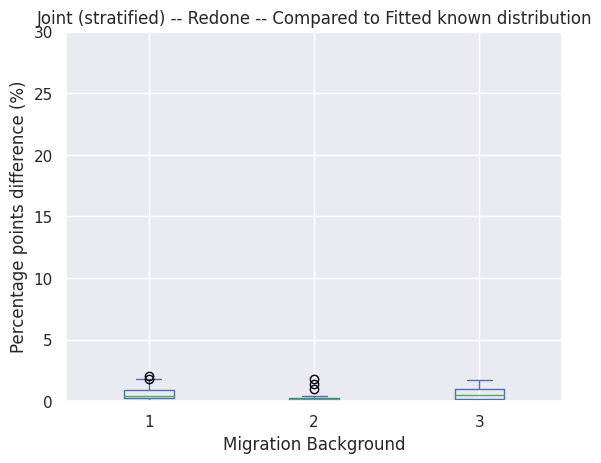

In [ ]:
df_fitted = fit_df_migration_background(df_synth_pop)
df_mig_joint_fitted = synthetic_population_to_contingency(
        df_synth_pop, ['gender', 'small_age_group', 'migration_background']).reset_index()
df_mig_joint_fitted = df_mig_joint_fitted.merge(df_fitted, on=['gender', 'small_age_group', 'migration_background'])
df_mig_joint_fitted.loc[:, "frac_x"] = df_mig_joint_fitted.groupby(['gender', 'small_age_group']).count_x.transform(
        lambda x: x / x.sum())
df_mig_joint_fitted.loc[:, "frac_y"] = df_mig_joint_fitted.groupby(['gender', 'small_age_group']).count_y.transform(
        lambda x: x / x.sum())
df_mig_joint_fitted.loc[:, "diff"] = abs(df_mig_joint_fitted.frac_x - df_mig_joint_fitted.frac_y) * 100
df_mig_joint_fitted.loc[:, 'order'] = df_mig_joint_fitted.migration_background.map(
        {'Dutch': 1, 'Western': 2, 'NonWestern': 3})
df_mig_joint_fitted.plot(kind='box', by='order', column='diff')
plt.title("Joint (stratified) -- Redone -- Compared to Fitted known distribution")
plt.ylabel("Percentage points difference (%)")
plt.xlabel("Migration Background")
plt.ylim([0, 30])
plt.savefig(figs + 'migration_background_stratified_redone_scaled_fitted.png', dpi=300)


In [ ]:
df_edu_margins = get_education_attainment_margins()
df_edu_synth = synthetic_population_to_contingency(df_synth_pop, ['neighb_code', 'absolved_edu_3_cats'])
df_edu = df_edu_synth.merge(df_edu_margins.set_index(['neighb_code', 'absolved_edu_3_cats']), left_index=True,
                            right_index=True)
df_edu.reset_index(inplace=True)
df_edu.loc[:, "frac_x"] = df_edu.groupby(['neighb_code']).count_x.transform(
        lambda x: x / x.sum())
df_edu.loc[:, "frac_y"] = df_edu.groupby(['neighb_code']).count_y.transform(
        lambda x: x / x.sum())
df_edu.loc[:, "diff"] = abs(df_edu.frac_x - df_edu.frac_y) * 100
df_edu.loc[:, 'order'] = df_edu.absolved_edu_3_cats.map({'low': 1, 'middle': 2, 'high': 3})
df_edu

,neighb_code,absolved_edu_3_cats,count_x,count_y,frac_x,frac_y,diff,order
0,BU05181785,high,9,9.89673,0.163636,0.179941,1.630418,3
1,BU05181785,low,24,23.356282,0.436364,0.42466,1.170396,1
2,BU05181785,middle,22,21.746988,0.400000,0.3954,0.460022,2
3,BU05183284,high,4030,4028.324786,0.268488,0.268376,0.011161,3
4,BU05183284,low,4092,4092.470085,0.272618,0.27265,0.003132,1
5,BU05183284,middle,6888,6889.205128,0.458894,0.458974,0.008029,2
6,BU05183387,high,1194,1192.323391,0.136770,0.136578,0.019205,3
7,BU05183387,low,4452,4454.081633,0.509966,0.510204,0.023845,1
8,BU05183387,middle,3084,3083.594976,0.353265,0.353218,0.004639,2
9,BU05183396,high,1279,1277.056856,0.160779,0.160535,0.024427,3


In [ ]:
df_migration_margins = read_df_migration_background_marginal().set_index(['neighb_code', 'migration_background'])
df_migration_synth = synthetic_population_to_contingency(df_synth_pop, ['neighb_code', 'migration_background'])
df_mig_marginal = df_migration_synth.merge(df_migration_margins, left_index=True, right_index=True).reset_index()

df_mig_marginal.loc[:, "frac_x"] = df_mig_marginal.groupby(['neighb_code']).count_x.transform(
        lambda x: x / x.sum())
df_mig_marginal.loc[:, "frac_y"] = df_mig_marginal.groupby(['neighb_code']).count_y.transform(
        lambda x: x / x.sum())
df_mig_marginal.loc[:, "diff"] = abs(df_mig_marginal.frac_x - df_mig_marginal.frac_y) * 100
df_mig_marginal.loc[:, 'order'] = df_mig_marginal.migration_background.map(
        {'Dutch': 1, 'Western': 2, 'NonWestern': 3})
df_mig_marginal

,neighb_code,migration_background,count_x,count_y,frac_x,frac_y,diff,order
0,BU05181785,Dutch,31,30,0.563636,0.545455,1.818182,1
1,BU05181785,NonWestern,20,20,0.363636,0.363636,0.000000,3
2,BU05181785,Western,4,5,0.072727,0.090909,1.818182,2
3,BU05183284,Dutch,9351,9350,0.622985,0.622918,0.006662,1
4,BU05183284,NonWestern,3032,3030,0.201999,0.201865,0.013324,3
5,BU05183284,Western,2627,2630,0.175017,0.175217,0.019987,2
6,BU05183387,Dutch,2130,2130,0.243986,0.243986,0.000000,1
7,BU05183387,NonWestern,5494,5495,0.629324,0.629439,0.011455,3
8,BU05183387,Western,1106,1105,0.126690,0.126575,0.011455,2
9,BU05183396,Dutch,2077,2075,0.261094,0.260842,0.025141,1


In [ ]:
def map_to_3_household_types(row):
    if "married" in row.hh_type and "with" in row.hh_type and row.hh_size > 2:
        row.small_hh_type = "with_children"
    elif "single_parent" in row.hh_type and row.hh_size > 1:
        row.small_hh_type = "with_children"
    elif row.hh_size == 1:
        row.small_hh_type = "single_person"
    else:
        row.small_hh_type = "without_children"
    return row

In [ ]:
df_hh = pd.read_pickle('../output/synthetic_population/with_households/households/synth_households_DHWZ_v10.pkl')
df_hh.loc[:, 'small_hh_type'] = None
df_hh = df_hh.apply(map_to_3_household_types, axis=1)
df_hh

,household_id,neighb_code,hh_type,hh_size,small_hh_type,PC6,main_bread_winner_age,main_bread_winner_migration_background,income_age_group,income_household_type,income_group,car_license,motorcycle_license,vehicle_ownership_income_group,cars,motorcycles
0,SSH000000,BU05181785,married_with_1_children,3,with_children,2544CV,57,Dutch,45-65,couple_with_children,10,3,0,5,2.0,0.0
1,SSH000001,BU05181785,married_no_children,2,without_children,2544CW,43,Dutch,25-45,couple_no_children,10,2,0,5,0.0,0.0
2,SSH000002,BU05181785,married_no_children,2,without_children,2544CW,31,Western,25-45,couple_no_children,10,2,1,5,0.0,0.0
3,SSH000003,BU05183284,married_with_1_children,3,with_children,2541XG,71,Dutch,65+,couple_with_children,1,3,0,1,0.0,0.0
4,SSH000004,BU05183284,married_with_1_children,3,with_children,2541XG,66,Dutch,65+,couple_with_children,10,2,0,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42345,SSH042345,BU05183639,single,1,single_person,2533CL,67,Dutch,65+,single,9,1,0,5,1.0,0.0
42346,SSH042346,BU05183639,single,1,single_person,2533CL,67,Dutch,65+,single,9,1,0,5,1.0,0.0
42347,SSH042347,BU05183639,single,1,single_person,2533CL,65,NonWestern,65+,single,4,0,0,2,0.0,0.0
42348,SSH042348,BU05183639,single,1,single_person,2533CL,65,NonWestern,65+,single,5,0,0,3,0.0,0.0


In [ ]:
df_hh.groupby(['hh_type', 'hh_size', 'small_hh_type']).hh_size.count()

hh_type                      hh_size  small_hh_type   
married_no_children          2        without_children     3330
married_with_1_children      3        with_children        3372
married_with_2_children      4        with_children        3621
married_with_3_children      5        with_children        1643
non_married_no_children      2        without_children     2468
non_married_with_1_children  3        with_children        1134
non_married_with_2_children  4        with_children        1219
non_married_with_3_children  5        with_children         547
single                       1        single_person       22032
single_parent_1_children     2        with_children        1838
single_parent_2_children     3        with_children         836
single_parent_3_children     4        with_children         310
Name: hh_size, dtype: int64

In [ ]:
df_hh_from_synth = df_hh.groupby(['neighb_code', 'small_hh_type']).hh_type.count().rename('count')
df_hh_from_synth

neighb_code  small_hh_type   
BU05181785   single_person         10
             with_children          3
             without_children      18
BU05183284   single_person       4018
             with_children       2088
             without_children    1811
BU05183387   single_person       2018
             with_children       1679
             without_children     389
BU05183396   single_person       1812
             with_children       1449
             without_children     512
BU05183398   single_person       2429
             with_children       2043
             without_children     589
BU05183399   single_person        470
             with_children        184
             without_children     207
BU05183480   single_person       1722
             with_children       1034
             without_children     418
BU05183488   single_person       1639
             with_children       1336
             without_children     574
BU05183489   single_person       1918
             with_ch

In [ ]:
df_hh_margins = read_marginal_data(['single_person', 'without_children', 'with_children'],
                                   'small_hh_type').set_index(['neighb_code', 'small_hh_type']).merge(
        df_hh_from_synth, left_index=True, right_index=True
).reset_index()
df_hh_margins.loc[:, "frac_x"] = df_hh_margins.groupby(['neighb_code']).count_x.transform(
        lambda x: x / x.sum())
df_hh_margins.loc[:, "frac_y"] = df_hh_margins.groupby(['neighb_code']).count_y.transform(
        lambda x: x / x.sum())
df_hh_margins.loc[:, "diff"] = abs(df_hh_margins.frac_x - df_hh_margins.frac_y) * 100
df_hh_margins.loc[:, 'small_hh_type'] = df_hh_margins.small_hh_type.replace(
        {'without_children': '󠁡w/o children', 'single_person': 'single', 'with_children': 'w/ children'})
df_hh_margins.loc[:, 'order'] = df_hh_margins.small_hh_type.map({'single': 1, 'w/ children': 2, '󠁡w/o children': 3})
df_hh_margins

,neighb_code,small_hh_type,count_x,count_y,frac_x,frac_y,diff,order
0,BU05181785,single,10,10,0.500000,0.322581,17.741935,1
1,BU05183284,single,3735,4018,0.475796,0.507515,3.171929,1
2,BU05183387,single,1880,2018,0.467081,0.493882,2.680080,1
3,BU05183396,single,1690,1812,0.450067,0.480254,3.018786,1
4,BU05183398,single,2255,2429,0.455556,0.479945,2.438912,1
5,BU05183399,single,435,470,0.524096,0.545877,2.178050,1
6,BU05183480,single,1650,1722,0.510046,0.542533,3.248671,1
7,BU05183488,single,1500,1639,0.432277,0.461820,2.954357,1
8,BU05183489,single,1865,1918,0.576507,0.611023,3.451566,1
9,BU05183536,single,95,96,0.760000,0.780488,2.048780,1


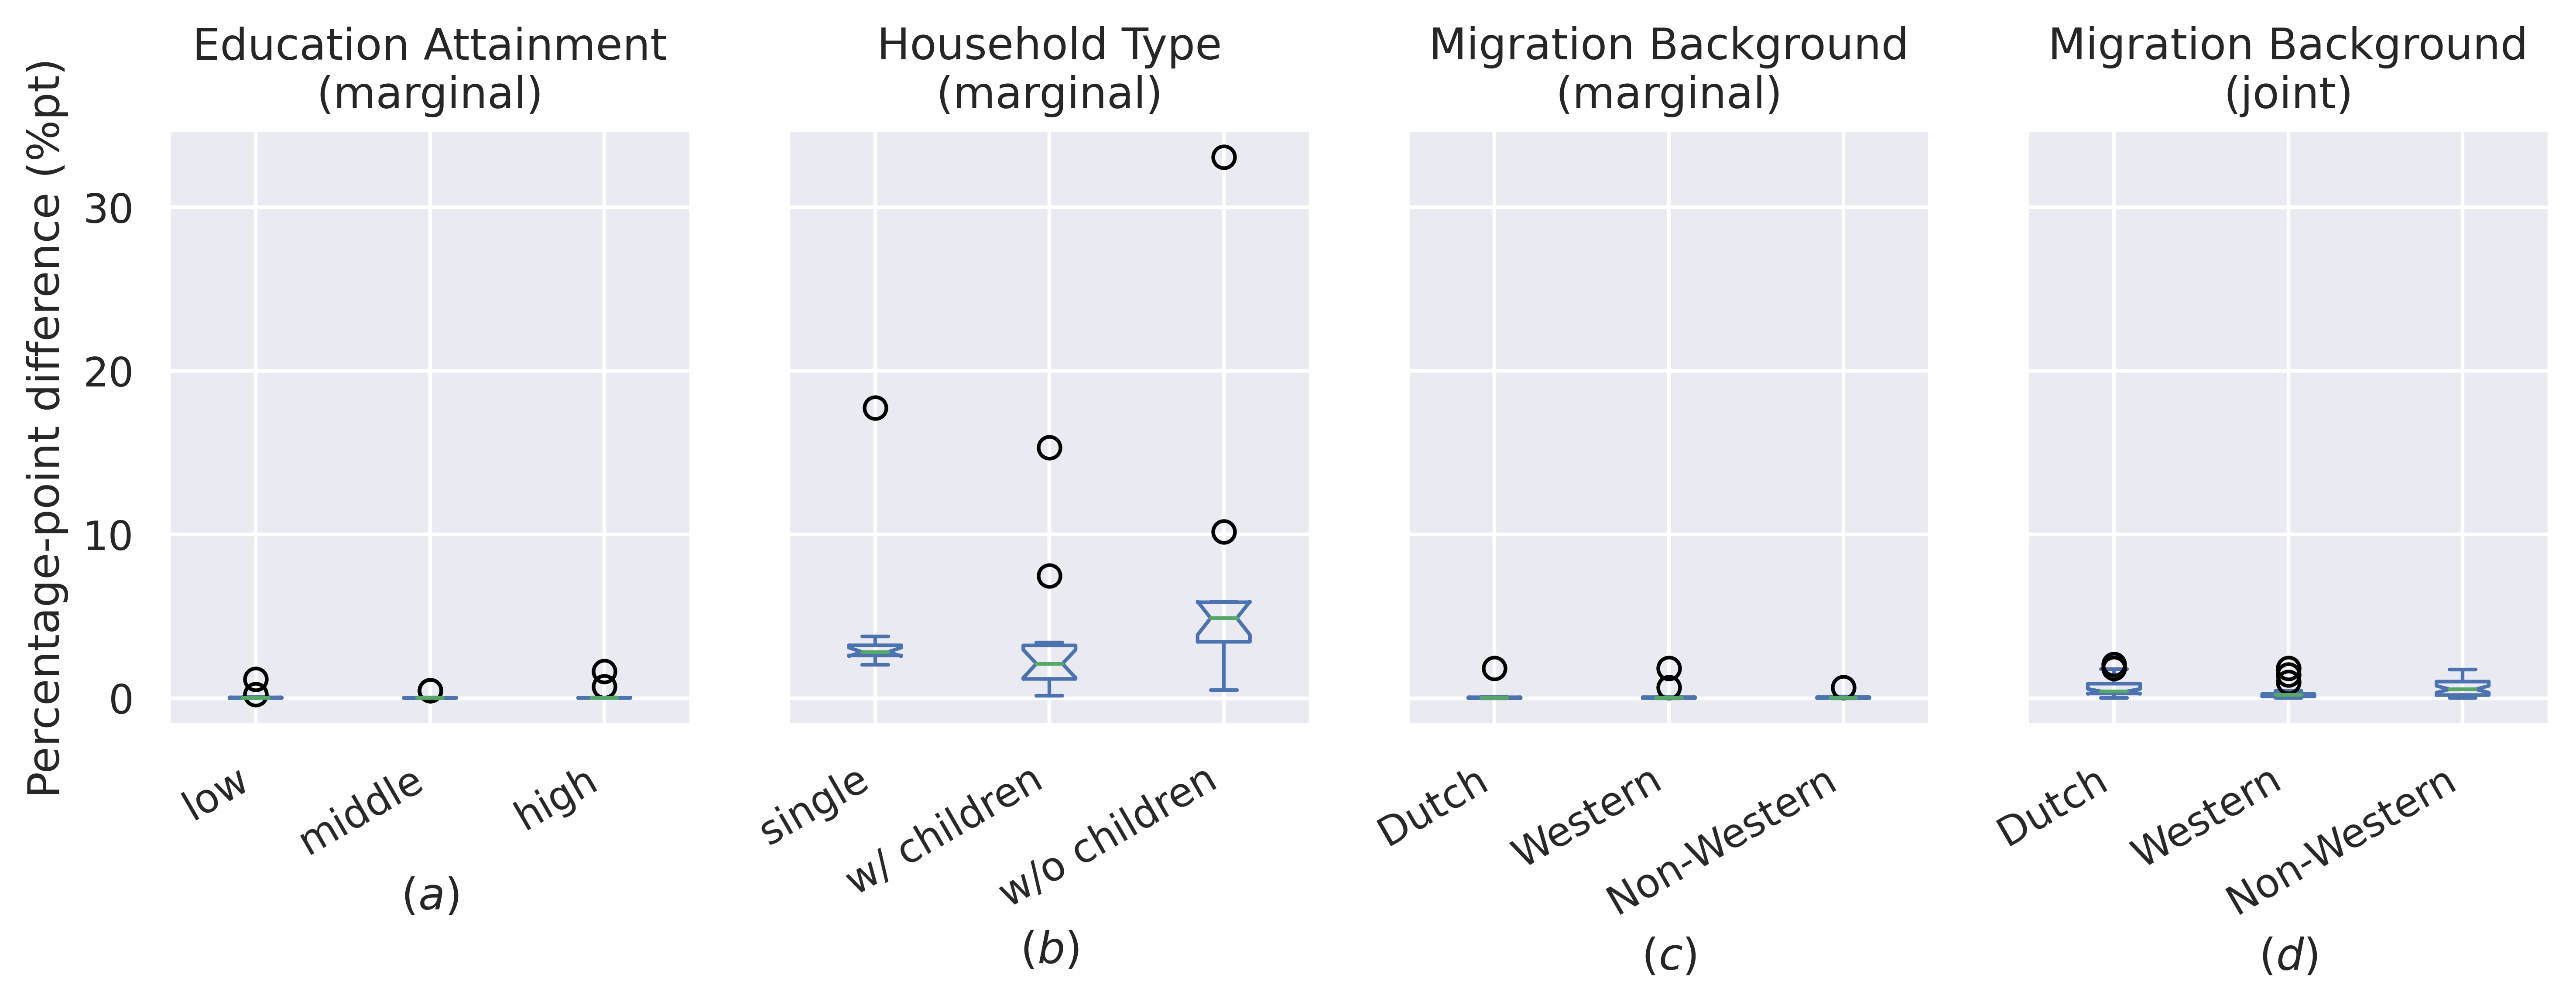

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=False, dpi=600, figsize=(10, 4))

df_mig_joint_fitted.plot(kind='box', by='order', column='diff', ax=ax4, notch=True)
df_edu.reset_index(drop=True).plot(
        kind='box', by='order', column='diff', ax=ax1, notch=True)
df_hh_margins.plot(
        kind='box', column='diff', by='order', ax=ax2, notch=True)
df_mig_marginal.plot(kind='box', by='order', column='diff', ax=ax3, notch=True)
ax1.set_title("Education Attainment\n(marginal)")
ax2.set_title("Household Type\n(marginal)")
ax3.set_title("Migration Background\n(marginal)")
ax4.set_title('Migration Background\n(joint)')
ax1.set_ylabel("Percentage-point difference (%pt)")
ax1.set_xticklabels(['low', 'middle', 'high'], rotation=30, ha='right')
ax2.set_xticklabels(['single', 'w/ children', 'w/o children'], rotation=30, ha='right')
ax3.set_xticklabels(['Dutch', 'Western', 'Non-Western'], rotation=30, ha='right')
ax4.set_xticklabels(['Dutch', 'Western', 'Non-Western'], rotation=30, ha='right')
ax1.set_xlabel('($a$)')
ax2.set_xlabel('($b$)')
ax3.set_xlabel('($c$)')
ax4.set_xlabel('($d$)')
plt.tight_layout()
plt.savefig(figs + 'plot_marginal_percentage_diff_paper_updated.png', dpi=600)
plt.savefig(figs + 'plot_marginal_percentage_diff_paper_updated.pdf')
plt.show()